# Fixed-Length Cost-to-Go and Cost-to-Come

아래와 같은 그래프 구조로 표현되는 도시들이 있다.

- Node는 도시를 의미하며, 총 5개의 도시가 존재한다.
(A, B, C, D, E)

- Edge는 비용을 의미하며, 도시와 도시 사이의 이동에 드는 cost이다.

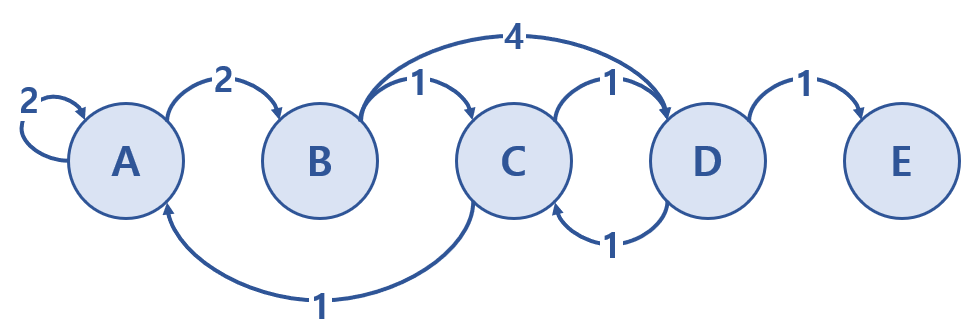

## Fixed-Length Cost-to-Go and Cost-to-Come


### **1. Backward value iteration **


1. D 도시는 도착 지점 입니다.

2. A, B, C, D, E에서 출발하여, **다섯 번** 이동 후 도착 지점(D 도시)에 도달해야합니다.

3. 초기 위치 지정도 한 번 이동으로 간주합니다.

In [ ]:
import numpy as np
# Row : 출발
# Col : 도착
################## Fill Your Code! ##################

cost4transition = np.array([[2.,2., np.inf, np.inf, np.inf],[np.inf, np.inf, 1., 4., np.inf], [1, np.inf, np.inf, 1., np.inf], [np.inf,np.inf,1.,np.inf,1.], [np.inf,np.inf,np.inf,np.inf,np.inf]])
#####################################################
cost4transition

array([[ 2.,  2., inf, inf, inf],
       [inf, inf,  1.,  4., inf],
       [ 1., inf, inf,  1., inf],
       [inf, inf,  1., inf,  1.],
       [inf, inf, inf, inf, inf]])

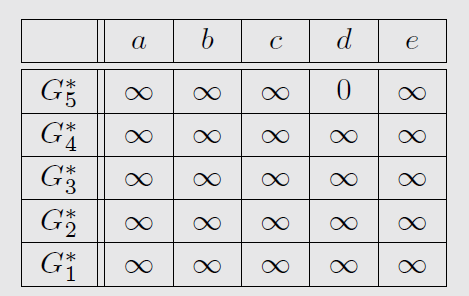

In [ ]:
# City Index
a, b, c, d, e = 0, 1, 2, 3, 4
goal = d

# Fixed Length
fixed_length = 5

# Initialization
################## Fill Your Code! ##################

num_city = len(cost4transition[0])
G = np.full((num_city, num_city), np.inf)
G[0, goal] = 0.
#####################################################
G

array([[inf, inf, inf,  0., inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]])

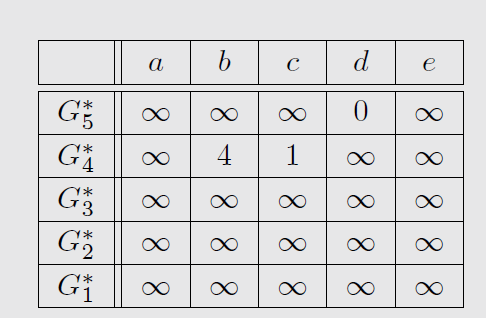

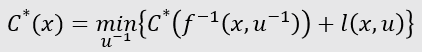

In [ ]:
# Parameters
# k: 현재 iteration 횟수
# G: cost_to_go를 기록할 matrix
def backward_value_iteration(k, G):
  ################## Fill Your Code! ##################
  for i in range(fixed_length):
    if G[k-1,i] != np.inf:
      q = G[k-1,i]
      for j in range(fixed_length):
        if cost4transition[j,i] != np.inf:
          p = cost4transition[j,i]
          h = p + q
          if G[k,j] == np.inf:
            G[k,j] = h
          elif G[k,j] != np.inf:
            f = G[k,j]
            hh = min(f,h)
            G[k,j] = hh
  #####################################################
  return G

G = backward_value_iteration(1, G)
G

array([[inf, inf, inf,  0., inf],
       [inf,  4.,  1., inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]])

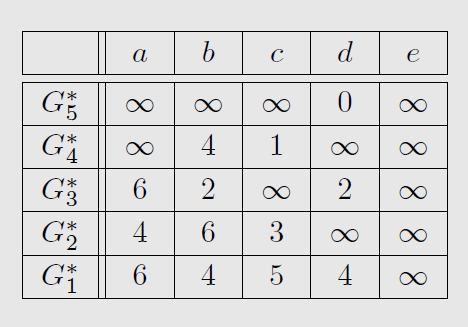

In [ ]:
# Parameters 설명
# end_point: [a, b, c, d, e] -> [0, 1, 2, 3, 4]
# fixed_point: iteration 횟수
def func_cost_to_go(end_point, fixed_point):
  # Initialization
  num_city = len(cost4transition[0])
  G = np.full((fixed_length, num_city), np.inf)
  G[0, goal] = 0
  for k in range(1, fixed_point):
    ################## Fill Your Code! ##################

    G = backward_value_iteration(k, G)
    #####################################################
  return G

G = func_cost_to_go(end_point=3, fixed_point=5)
G

array([[inf, inf, inf,  0., inf],
       [inf,  4.,  1., inf, inf],
       [ 6.,  2., inf,  2., inf],
       [ 4.,  6.,  3., inf, inf],
       [ 6.,  4.,  5.,  4., inf]])

### **2. Forward value iteration **

1. A 도시는 시작 지점 입니다.

2. A에서 출발하여, **다섯 번** 이동 후 A, B, C, D, E에 도착합니다.

3. 초기 위치 지정도 한 번 이동으로 간주합니다.

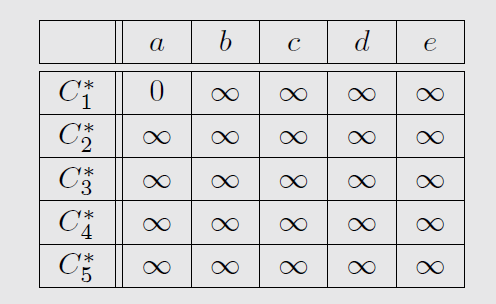

In [ ]:
# City Index
a, b, c, d, e = 0, 1, 2, 3, 4
initial = a

# Fixed Length
fixed_length = 5

# Initialization
################## Fill Your Code! ##################

num_city = len(cost4transition[0])
C = np.full((num_city, num_city), np.inf)
C[0, initial] = 0.
#####################################################
C

array([[ 0., inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]])

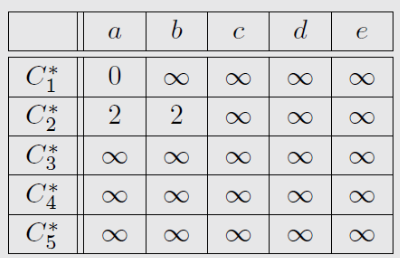

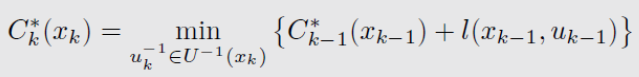

In [ ]:
# Parameters
# k: 현재 iteration 횟수
# C: cost_to_come를 기록할 matrix
def forward_value_iteration(k, C):
  ################## Fill Your Code! ##################
  for i in range(fixed_length):
    if C[k-1,i] != np.inf:
      q = C[k-1,i]
      for j in range(fixed_length):
        if cost4transition[i,j] != np.inf:
          p = cost4transition[i,j]
          h = p + q
          if C[k,j] == np.inf:
            C[k,j] = h
          elif C[k,j] != np.inf:
            f = C[k,j]
            hh = min(f,h)
            C[k,j] = hh

  #####################################################
  return C

C = forward_value_iteration(1, C)
C

array([[ 0., inf, inf, inf, inf],
       [ 2.,  2., inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]])

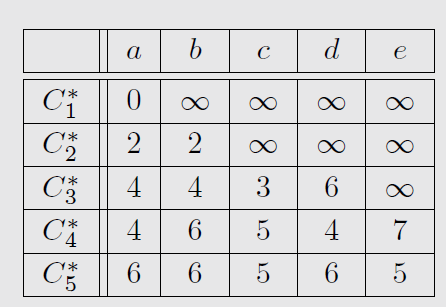

In [ ]:
# Parameters 설명
# start_point: [a, b, c, d, e] -> [0, 1, 2, 3, 4]
# fixed_point: iteration 횟수
def func_cost_to_come(start_point=0, fixed_point=1):
    # Initialization
    num_city = len(cost4transition[0])
    C = np.full((fixed_length, num_city), np.inf)
    C[0, initial] = 0
    for k in range(1, fixed_point):
    ################## Fill Your Code! ##################

        C = forward_value_iteration(k,C)
    #####################################################
    return C

C = func_cost_to_come(start_point=0, fixed_point=5)
C

array([[ 0., inf, inf, inf, inf],
       [ 2.,  2., inf, inf, inf],
       [ 4.,  4.,  3.,  6., inf],
       [ 4.,  6.,  5.,  4.,  7.],
       [ 6.,  6.,  5.,  6.,  5.]])

## Unfixed-Length Cost-to-Go and Cost-to-Come


아래와 같은 그래프 구조로 표현되는 도시들이 있다.

- Node는 도시를 의미하며, 총 5개의 도시가 존재한다.
(A, B, C, D, E)

- Edge는 비용을 의미하며, 도시와 도시 사이의 이동에 드는 cost이다.

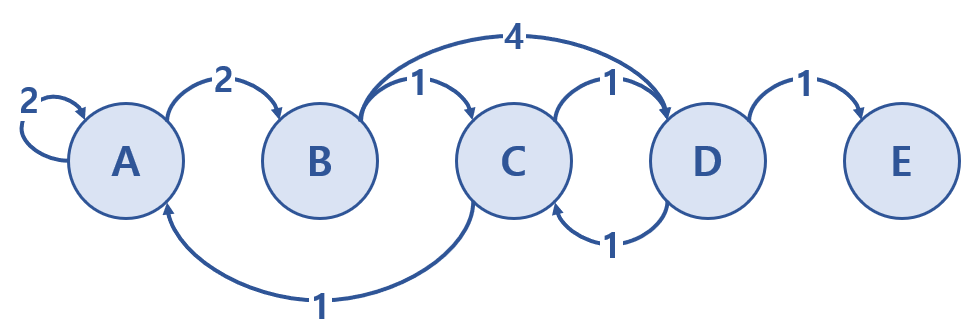

### **1. Backward value iteration **



1. D 도시는 도착 지점 입니다.

2. A, B, C, D, E에서 출발하여, D 방으로 가는 최소 비용은 얼마일까요? **(이동 횟수 관계X)**

3. 초기 위치 지정도 한 번 이동으로 간주합니다.

In [ ]:
import numpy as np
# Row : 출발
# Col : 도착
################## Fill Your Code! ##################

cost4transition =np.array([[2.,2., np.inf, np.inf, np.inf],[np.inf, np.inf, 1., 4., np.inf], [1, np.inf, np.inf, 1., np.inf], [np.inf,np.inf,1., 0 ,1.], [np.inf,np.inf,np.inf,np.inf,np.inf]])
#####################################################
cost4transition

array([[ 2.,  2., inf, inf, inf],
       [inf, inf,  1.,  4., inf],
       [ 1., inf, inf,  1., inf],
       [inf, inf,  1.,  0.,  1.],
       [inf, inf, inf, inf, inf]])

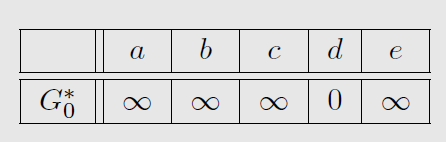

In [ ]:
# City Index
a, b, c, d, e = 0, 1, 2, 3, 4
goal = d

# Initialization
################## Fill Your Code! ##################

num_city = len(cost4transition[0])
G = np.full(num_city, np.inf)
G[goal] = 0.
#####################################################
G

array([inf, inf, inf,  0., inf])

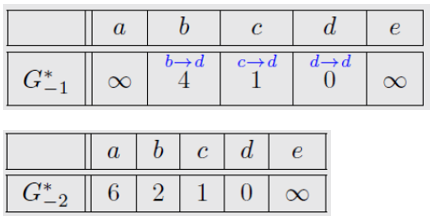

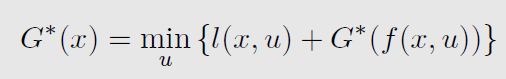

In [ ]:
# Parameters
# k: 현재 iteration 횟수
# G: cost_to_go를 기록할 matrix
def UF_backward_value_iteration(G):
  ################## Fill Your Code! ##################
  for i in range(len(G)):
    if G[i] != np.inf:
      q = G[i]
      for j in range(len(G)):
        if cost4transition[j,i] != np.inf:
          p = cost4transition[j,i]
          h = p + q
          if G[j] == np.inf:
            G[j] = h
          elif G[j] != np.inf:
            f = G[j]
            hh = min(f,h)
            G[j] = hh
        else:
          G = G
  #####################################################
  return G

print("1회 반복")
G = UF_backward_value_iteration(G)
print(G)

print("2회 반복")
G = UF_backward_value_iteration(G)
print(G)

1회 반복
[inf  4.  1.  0. inf]
2회 반복
[ 6.  2.  1.  0. inf]


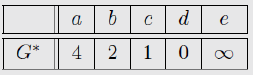

In [ ]:
# Parameters 설명
# end_point: [a, b, c, d, e] -> [0, 1, 2, 3, 4]
def UF_func_cost_to_go(end_point):
  # Initialization
  num_city = len(cost4transition[0])
  G = np.full(num_city, np.inf)
  G[goal] = 0
  while True:
    G_pre = G.copy()
    ################## Fill Your Code! ##################

    G = UF_backward_value_iteration(G)
    #####################################################
    if np.array_equal(G_pre, G):
      break
  return G

G = UF_func_cost_to_go(end_point=3)
G

array([ 4.,  2.,  1.,  0., inf])

### **2. Forward value iteration **



1. B 도시는 시작 지점 입니다.

2. B에서 출발하여, A, B, C, D, E에 도착합니다. **(이동 횟수 관계X)**

3. 초기 위치 지정도 한 번 이동으로 간주합니다.

In [ ]:
import numpy as np
# Row : 출발
# Col : 도착
################## Fill Your Code! ##################

cost4transition = np.array([[2.,2., np.inf, np.inf, np.inf],[np.inf, 0, 1., 4., np.inf], [1, np.inf, np.inf, 1., np.inf], [np.inf,np.inf,1., np.inf ,1.], [np.inf,np.inf,np.inf,np.inf,np.inf]])
#####################################################
cost4transition

array([[ 2.,  2., inf, inf, inf],
       [inf,  0.,  1.,  4., inf],
       [ 1., inf, inf,  1., inf],
       [inf, inf,  1., inf,  1.],
       [inf, inf, inf, inf, inf]])

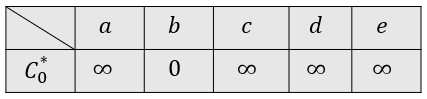

In [ ]:
# City Index
a, b, c, d, e = 0, 1, 2, 3, 4
start = b

# Initialization
################## Fill Your Code! ##################

num_city = len(cost4transition[0])
C = np.full(num_city, np.inf)
C[start] = 0.
#####################################################
C

array([inf,  0., inf, inf, inf])

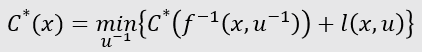

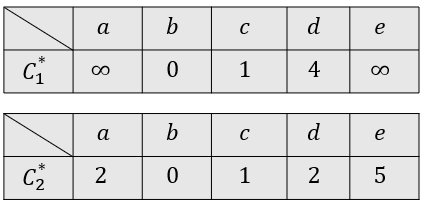

In [ ]:
# Parameters
# C: cost_to_come를 기록할 matrix
def UF_forward_value_iteration(C):
  ################## Fill Your Code! ##################
  C_ = C.copy()
  for i in range(len(C)):
    if C[i] != np.inf:
      q = C[i]
      for j in range(len(C)):
        if cost4transition[i,j] != np.inf:
          p = cost4transition[i,j]
          h = p + q
          if C_[j] == np.inf:
            C_[j] = h
          elif C_[j] != np.inf:
            f = C_[j]
            hh = min(f,h)
            C_[j] = hh
  C = C_
  #####################################################
  return C

print("1회 반복")
C = UF_forward_value_iteration(C)
print(C)

print("2회 반복")
C = UF_forward_value_iteration(C)
print(C)

1회 반복
[inf  0.  1.  4. inf]
2회 반복
[2. 0. 1. 2. 5.]


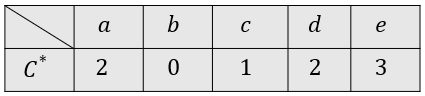

In [ ]:
# Parameters 설명
# start_point: [a, b, c, d, e] -> [0, 1, 2, 3, 4]
def UF_func_cost_to_come(start_point):
  # Initialization
  num_city = len(cost4transition[0])
  C = np.full(num_city, np.inf)
  C[start_point] = 0
  while True:
    C_pre = C.copy()
    ################## Fill Your Code! ##################

    C = UF_forward_value_iteration(C)
    #####################################################
    if np.array_equal(C_pre, C):
      break
  return C

C = UF_func_cost_to_come(start_point=1)
C

array([2., 0., 1., 2., 3.])